In [10]:
! pip install openpyxl
! pip install matplotlib

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)


In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Nulo

In [15]:
# Reemplazar los valores nulos en la columna "Description" por "DESCONOCIDO"
df['Description'].fillna('DESCONOCIDO', inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Consistencia de Datos

In [16]:
# Eliminar las transacciones que tienen valores negativos en la columna "Quantity"
df = df[df['Quantity'] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Ingenieria de Datos

In [17]:

# Agregar una columna para el valor total de la transacción
df['Total'] = df['Quantity'] * df['UnitPrice']

# Agregar una columna para el mes de la transacción
df['Month'] = df['InvoiceDate'].dt.month

# Agregar una columna para el día de la semana de la transacción
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df

/var/folders/_m/zrywqjcn66j88_lz9f9pm4gc0000gn/T/ipykernel_30017/533907782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Quantity'] * df['UnitPrice']
/var/folders/_m/zrywqjcn66j88_lz9f9pm4gc0000gn/T/ipykernel_30017/533907782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month
/var/folders/_m/zrywqjcn66j88_lz9f9pm4gc0000gn/T/ipykernel_30017/533907782.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,4


In [18]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,Month,DayOfWeek
count,531285.000000,531285,531285.000000,397924.000000,531285.00000,531285.000000,531285.000000
mean,10.655262,2011-07-04 18:15:45.816539136,3.857296,15294.315171,20.03550,7.560244,2.435561
min,1.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-11062.06000,1.000000,0.000000
25%,1.000000,2011-03-28 11:59:00,1.250000,13969.000000,3.75000,5.000000,1.000000
50%,3.000000,2011-07-20 12:01:00,2.080000,15159.000000,9.90000,8.000000,2.000000
75%,10.000000,2011-10-19 12:35:00,4.130000,16795.000000,17.70000,11.000000,4.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.60000,12.000000,6.000000
std,156.830323,NaN,41.810047,1713.169877,270.91237,3.508717,1.849816


# Visualizaciones

Transacciones por país


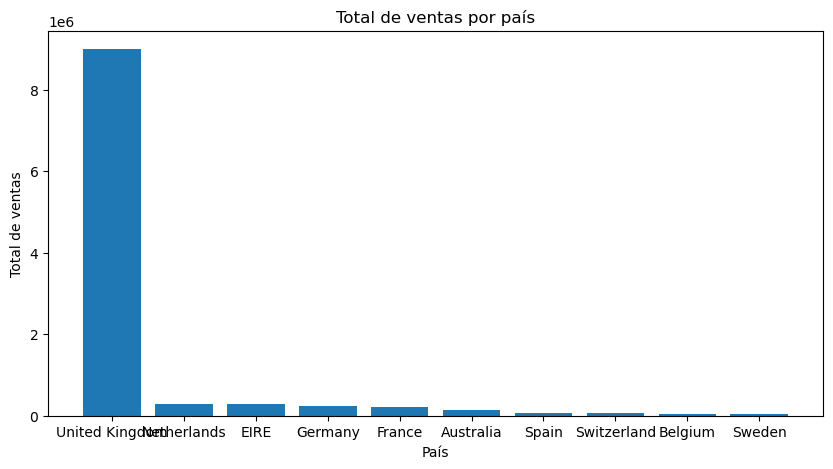

In [19]:
# Visualizar los datos de las transacciones por país
countries = df.groupby('Country')['Total'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 5))
plt.title('Total de ventas por país')
plt.ylabel('Total de ventas')
plt.xlabel('País')
plt.bar(countries.index, countries.values)
plt.show()


Transacciones por mes

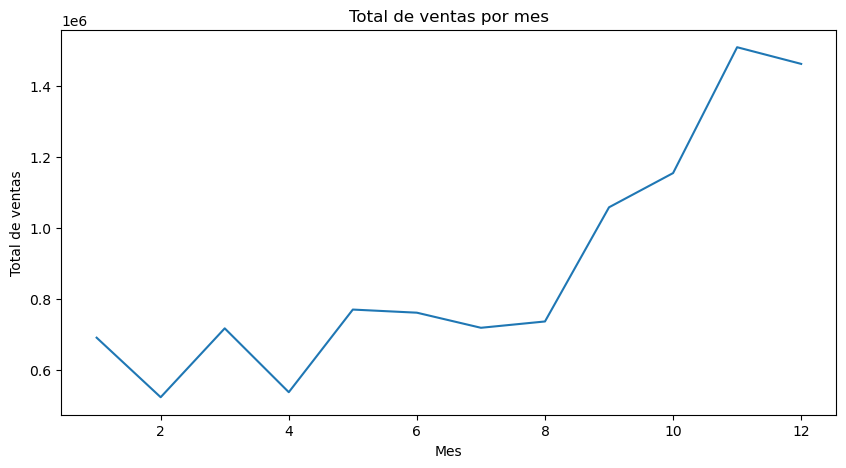

In [22]:
# Visualizar los datos de las transacciones por mes
months = df.groupby('Month')['Total'].sum()
plt.figure(figsize=(10, 5))
plt.title('Total de ventas por mes')
plt.ylabel('Total de ventas')
plt.xlabel('Mes')
plt.plot(months.index, months.values)
plt.show()


Transacciones por día de la semana

Vas a experimentar un error, encuentra la forma de arreglarlo 

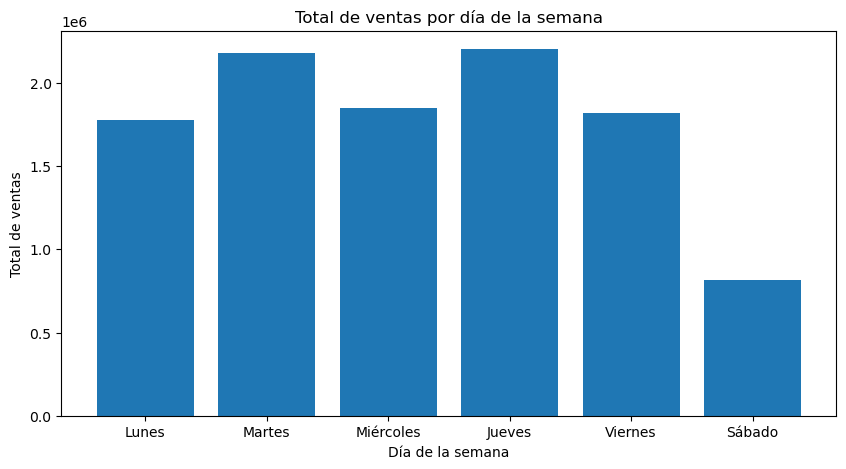

In [23]:

# Visualizar los datos de las transacciones por día de la semana
days = ['Lunes', 'Martes', 'Miércoles',
        'Jueves', 'Viernes', 'Sábado']
dayofweek = df.groupby('DayOfWeek')['Total'].sum()
dayofweek.index = days
plt.figure(figsize=(10, 5))
plt.title('Total de ventas por día de la semana')
plt.ylabel('Total de ventas')
plt.xlabel('Día de la semana')
plt.bar(dayofweek.index, dayofweek.values)
plt.show()
